Chọn ảnh:
1: exercise/pagoda.jpg
2: exercise/papaya.jpg
3: exercise/quang_ninh.jpg



Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Zoom
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Đổi ảnh khác
7. Thoát chương trình


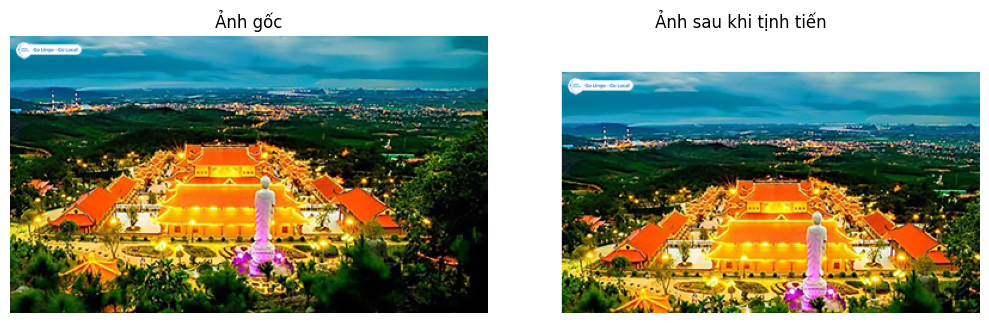


Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Zoom
4. Làm mờ Gaussian
5. Biến đổi sóng
6. Đổi ảnh khác
7. Thoát chương trình
✅ Thoát chương trình.


In [3]:
import cv2
import numpy as np
from scipy.ndimage import rotate, gaussian_filter, map_coordinates, zoom
import imageio.v2 as iio
import matplotlib.pyplot as plt

image_list = {
    "1": "exercise/pagoda.jpg",
    "2": "exercise/papaya.jpg",
    "3": "exercise/quang_ninh.jpg"
}

def select_image():
    print("Chọn ảnh:")
    for k, v in image_list.items():
        print(f"{k}: {v}")
    choice = input("Nhập số ảnh (1-3): ")
    return iio.imread(image_list.get(choice, "exercise/pagoda.jpg"))

def resize_image(img, max_size=400):
    h, w = img.shape[:2]
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        return cv2.resize(img, (int(w*scale), int(h*scale)))
    return img

def show_result(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

def wave_transform(image, amplitude=10, frequency=0.05):
    H, W = image.shape[:2]
    M = np.indices((H, W))
    dx = amplitude * np.sin(2 * np.pi * M[0] * frequency)
    dy = amplitude * np.cos(2 * np.pi * M[1] * frequency)
    coords = M + np.array([dx, dy])
    coords = coords.reshape(2, -1)
    warped = np.zeros_like(image)
    for c in range(3):
        warped[..., c] = map_coordinates(image[..., c], coords, order=1, mode='reflect').reshape(H, W)
    return warped

# ========== MENU CHÍNH ========== #
def main_menu():
    while True:
        img = resize_image(select_image())  # chọn ảnh mỗi lần đầu
        while True:
            print("\nChọn phép biến đổi:")
            print("1. Tịnh tiến")
            print("2. Xoay")
            print("3. Zoom")
            print("4. Làm mờ Gaussian")
            print("5. Biến đổi sóng")
            print("6. Đổi ảnh khác")
            print("7. Thoát chương trình")

            choice = input("Nhập lựa chọn (1-7): ")

            if choice == "1":
                dx = int(input("Nhập số pixel tịnh tiến theo x: "))
                dy = int(input("Nhập số pixel tịnh tiến theo y: "))
                h, w = img.shape[:2]
                result = np.ones_like(img) * 255
                result[dy:h, dx:w] = img[0:h-dy, 0:w-dx]
                show_comparison(img, result, "Ảnh sau khi tịnh tiến")

            elif choice == "2":
                angle = float(input("Nhập góc xoay (độ): "))
                reshape = input("Giữ kích thước ảnh gốc? (y/n): ").lower() == 'n'
                result = rotate(img, angle=angle, reshape=reshape, mode='reflect')
                show_comparison(img, result, "Ảnh sau khi xoay")

            elif choice == "3":
                factor = float(input("Nhập hệ số zoom (ví dụ: 1.5): "))
                result = zoom(img, (factor, factor, 1))
                show_comparison(img, result, "Ảnh sau khi zoom")

            elif choice == "4":
                sigma = float(input("Nhập giá trị sigma (độ làm mờ): "))
                result = gaussian_filter(img, sigma=(sigma, sigma, 0))
                show_comparison(img, result, "Ảnh làm mờ Gaussian")

            elif choice == "5":
                amp = float(input("Nhập biên độ sóng (amplitude): "))
                result = wave_transform(img, amplitude=amp)
                show_comparison(img, result, "Ảnh sau biến đổi sóng")

            elif choice == "6":
                print("🔄 Đổi sang ảnh khác.")
                break  # Thoát vòng lặp trong để chọn lại ảnh mới

            elif choice == "7":
                print("✅ Thoát chương trình.")
                return  # Thoát khỏi cả 2 vòng lặp

            else:
                print("❌ Lựa chọn không hợp lệ.")

def show_comparison(original, transformed, title_result):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed)
    plt.title(title_result)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ======= Chạy chương trình ======= #
main_menu()
